## Importamos Librerías y Base de datos

Math

From the alternative regression, we run $ y $ on $ W $:

$ y = W{\hat{\theta_1}} + \epsilon_{y} \iff \epsilon_{y} = y W{\hat{\theta_1}}  $

Then, we run $ D $ on $ W $:

$ D = W{\hat{\theta_2}} + \epsilon_{D} \iff \epsilon_{D} = y W{\hat{\theta_2}}  $

Then, when running $ \epsilon_{y} $ on $ \epsilon_{D} $, we obtain the following equation:

$ y = W{\hat{\theta_1}} + D \psi - W{\hat{\theta_2}} \psi + \xi $

$ y = W{\hat{\theta_1}} + D \psi - W{\hat{\theta_2}} \psi + \xi $

$ y = D \psi + W{\hat{\theta_1}} - W{\hat{\theta_2}\psi } + \xi $

$ y = D \psi + W({\hat{\theta_1}} - {\hat{\theta_2}\psi }) + \xi $

Now, if we compare the last expression with the one given in the excercise $(y = D\beta_{1} + W\beta_{1} + \mu)$, we can conclude:

- $ \beta_{1} = \psi $
- $ \beta_{2} = \hat{\theta_1} - \hat{\theta_2} \psi $
- $ \mu = \xi $

And show that: $ \beta_{1} = \psi $


Question 2:

$ E [(Y - g(x))^{2}] $

$ E [(Y - E(Y \mid x)] + E[(Y \mid x) - g(x)]^{2} $

Remember: $ (a + b)^{2} = a^{2} + 2ab + b^{2} $

$ E [(Y - E(Y \mid x)^{2}] + E[(E(Y \mid x) - g(x))^{2}] + 2 E [(Y - E(Y \mid x)] E[E[(Y \mid x) - g(x)]] $

Taking last component from last equation, we use LIE:

$ 2 E [(Y - E(Y \mid x)] E[E[(Y \mid x) - g(x)]] $

$ E[E[(Y - E(Y \mid x)] [E(Y \mid x) - g(x)] \mid x] $

$ E[(E(Y \mid x))(E(Y \mid x) - g(x))] $

Where: $(E(Y \mid x)) = 0 $ 

Therefore, the whole expression is $0$

$ E [(Y - g(x))^{2}] = E [(Y - E(Y \mid x)^{2}] + E[(E(Y \mid x) - g(x))^{2}] $

Where: $ E[(E(Y \mid x) - g(x))^{2} ≥ 0 $

Therefore:

$ E [(Y - g(x))^{2}] ≥ E [(Y - E(Y \mid x)^{2}] $

$ E [(Y - g(x))^{2}] ≥ E[(ϵ^{2})] $

$ E [(Y - g(x))^{2}] = E[(ϵ^{2})] $

Replication 1 - Code

In [5]:
import pandas as pd
import numpy as np
import pyreadr as rr # package to use data form R format
import math
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [6]:
#pip install pyreadr

In [7]:
rdata_read = rr.read_r("/Users/frank/Downloads/basem.Rdata")

In [8]:
data = rdata_read[ 'data' ] 

data.shape

(5150, 20)

In [9]:
data['Education'] = None

condiciones = [
    (data['scl'] == 1),
    (data['clg'] == 1),
    (data['ad'] == 1)
]
valores = ['Some College', 'College Graduate', 'Advanced Degree']

data['Education'] = np.select(condiciones, valores, default=None)


## Generamos los gráficos

In [10]:
pd.option_context('mode.use_inf_as_na', True)

Text(0, 0.5, 'Género')

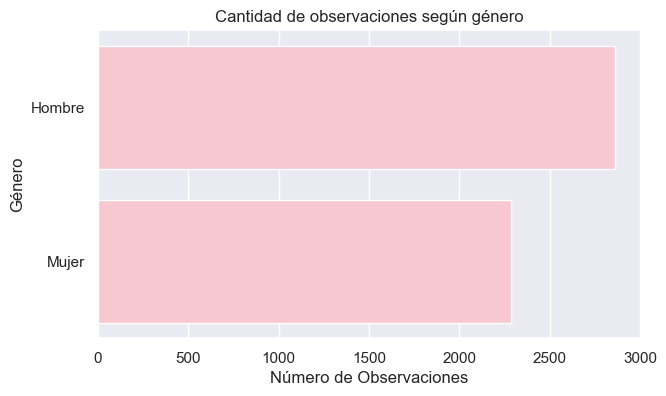

In [11]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(7, 4))

x = sns.countplot(y="sex", data=data, color='pink')

labels = ['Hombre', 'Mujer']
ax.set_yticklabels(labels)

plt.title('Cantidad de observaciones según género')
plt.xlabel('Número de Observaciones')
plt.ylabel('Género')


Text(0, 0.5, 'Número de Observaciones')

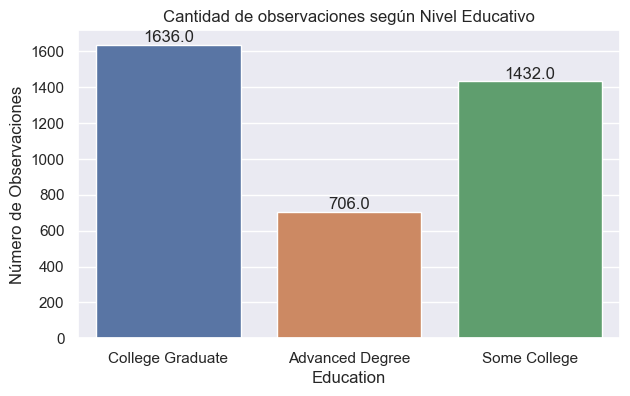

In [12]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(7, 4))

x = sns.countplot(x="Education", data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{}'.format(height), ha='center', va='bottom')
    
plt.title('Cantidad de observaciones según Nivel Educativo')
plt.ylabel('Número de Observaciones')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


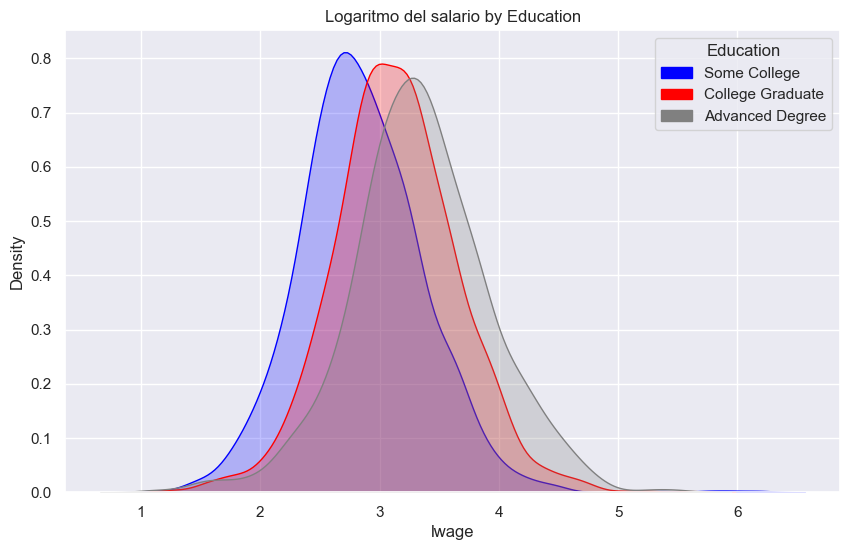

In [13]:
pd.option_context('mode.use_inf_as_na', True)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6)) 

sns.kdeplot(data.lwage[data.Education=='Some College'], label='Some College', fill=True, color="blue")
sns.kdeplot(data.lwage[data.Education=='College Graduate'], label='College Graduate', fill=True, color = "red")
sns.kdeplot(data.lwage[data.Education=='Advanced Degree'], label='Advanced Degree', fill=True, color="gray")
plt.title('Logaritmo del salario by Education')

color1 = 'blue'
color2 = 'red'
color3 = "gray"

handle1 = mpatches.Patch(color=color1, label='Some College')
handle2 = mpatches.Patch(color=color2, label='College Graduate')
handle3 = mpatches.Patch(color=color3, label='Advanced Degree')

plt.legend(handles=[handle1, handle2, handle3], title='Education')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


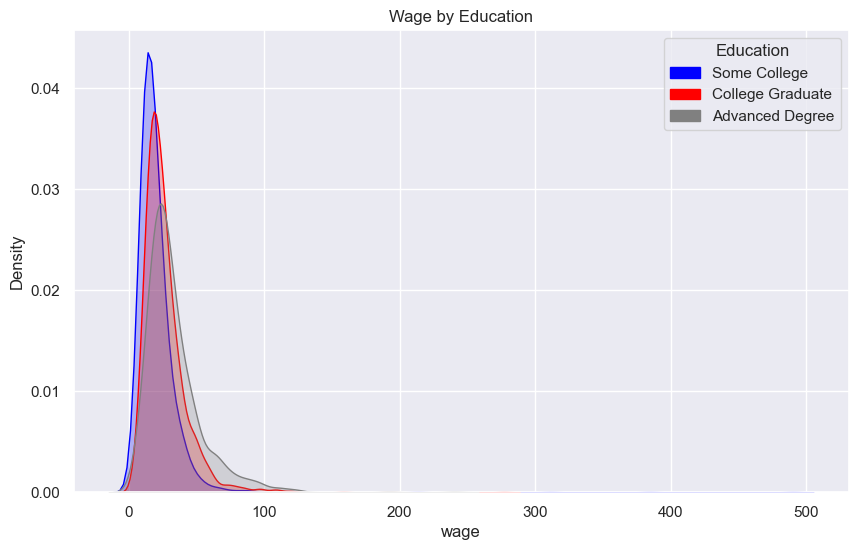

In [14]:
pd.option_context('mode.use_inf_as_na', True)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6)) 

sns.kdeplot(data.wage[data.Education=='Some College'], label='Some College', fill=True, color="blue")
sns.kdeplot(data.wage[data.Education=='College Graduate'], label='College Graduate', fill=True, color = "red")
sns.kdeplot(data.wage[data.Education=='Advanced Degree'], label='Advanced Degree', fill=True, color="gray")
plt.title('Wage by Education')

color1 = 'blue'
color2 = 'red'
color3 = "gray"

handle1 = mpatches.Patch(color=color1, label='Some College')
handle2 = mpatches.Patch(color=color2, label='College Graduate')
handle3 = mpatches.Patch(color=color3, label='Advanced Degree')

plt.legend(handles=[handle1, handle2, handle3], title='Education')


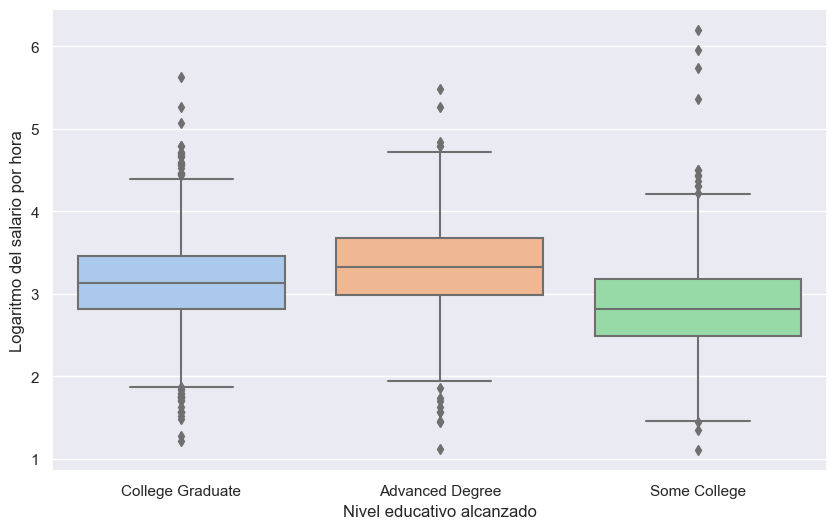

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

box = sns.boxplot(x="Education", y="lwage", data=data, palette='pastel')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Logaritmo del salario por hora')

plt.show()


## Replicación del código

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150 entries, 10 to 32643
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wage       5150 non-null   float64 
 1   lwage      5150 non-null   float64 
 2   sex        5150 non-null   float64 
 3   shs        5150 non-null   float64 
 4   hsg        5150 non-null   float64 
 5   scl        5150 non-null   float64 
 6   clg        5150 non-null   float64 
 7   ad         5150 non-null   float64 
 8   mw         5150 non-null   float64 
 9   so         5150 non-null   float64 
 10  we         5150 non-null   float64 
 11  ne         5150 non-null   float64 
 12  exp1       5150 non-null   float64 
 13  exp2       5150 non-null   float64 
 14  exp3       5150 non-null   float64 
 15  exp4       5150 non-null   float64 
 16  occ        5150 non-null   category
 17  occ2       5150 non-null   category
 18  ind        5150 non-null   category
 19  ind2       5150 non-null   cat

In [17]:
data[['wage', 'lwage', 'sex', 'scl', 'clg', 'ad', 'exp1', 'exp2', 'exp3', 'exp4']].describe()

,wage,lwage,sex,scl,clg,ad,exp1,exp2,exp3,exp4
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.278058,0.317670,0.137087,13.760583,3.018925,8.235867,25.118038
std,21.003016,0.570385,0.496955,0.448086,0.465616,0.343973,10.609465,4.000904,14.488962,53.530225
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000
75%,27.777778,3.324236,1.000000,1.000000,1.000000,0.000000,21.000000,4.410000,9.261000,19.448100
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100


In [18]:
data[['occ','occ2','ind','ind2']].describe()
#wage, lwage, sex, some college, college graduate, avdanced degree, Experienc

,occ,occ2,ind,ind2
count,5150,5150,5150,5150
unique,351,22,230,21
top,4700,17,770,18
freq,174,670,297,664


In [19]:
data[['scl','clg','ad','sex']].describe()

,scl,clg,ad,sex
count,5150.000000,5150.000000,5150.000000,5150.000000
mean,0.278058,0.317670,0.137087,0.444466
std,0.448086,0.465616,0.343973,0.496955
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [20]:
Submuestra_sup= data[(data['scl']==1)|(data['clg']==1)|(data['ad']==1)]

In [21]:
Z=Submuestra_sup[["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"]]

data_female=Submuestra_sup[Submuestra_sup['sex']==1]
Z_female=data_female[["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"]]

data_male=Submuestra_sup[Submuestra_sup['sex']==0]
Z_male=data_male[["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"]]

table=np.zeros((12,3))
table[:,0]=Z.mean().values
table[:,1]=Z_female.mean().values
table[:,2]=Z_male.mean().values
table_df=pd.DataFrame(table,columns=['All','Men','Women'])
table_df.index=["Log Wage","Sex","Some High School","High School Graduate","Some College","Gollage Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience"]

table_df


,All,Men,Women
Log Wage,3.062748,3.024417,3.099449
Sex,0.489136,1.000000,0.000000
Some High School,0.000000,0.000000,0.000000
High School Graduate,0.000000,0.000000,0.000000
Some College,0.379438,0.352113,0.405602
Gollage Graduate,0.433492,0.430661,0.436203
Advanced Degree,0.187069,0.217226,0.158195
Northeast,0.229200,0.238895,0.219917
Midwest,0.249868,0.254063,0.245851
South,0.298357,0.293066,0.303423


In [22]:
female_mean=data_female['lwage'].mean()
male_mean=data_male['lwage'].mean()
gendergap=female_mean-male_mean
gendergap

#el gender wage gap incondicional para la submuestra de individuos con educación superior es de 7.5%

-0.07503200512595809

In [23]:
#pip install statsmodels

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [25]:
nocontrol_model=smf.ols(formula='lwage~sex',data=Submuestra_sup)
nocontrol_est=nocontrol_model.fit().summary2().tables[1]['Coef.']['sex']
nocontrol_se2=nocontrol_model.fit().summary2().tables[1]['Std.Err.']['sex']

HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]
nocontrol_se

print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding standard error is {nocontrol_se2}' )
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}','\n' )

The estimated gender coefficient is -0.07503200512595666 and the corresponding standard error is 0.018373837141543097
The estimated gender coefficient is -0.07503200512595666 and the corresponding robust standard error is 0.018342600934807017 



In [26]:
nocontrol_model_fit = nocontrol_model.fit()
nocoefficients = nocontrol_model_fit.params 
std_errors = nocontrol_model_fit.bse
nocoefficients

Intercept    3.099449
sex         -0.075032
dtype: float64

In [27]:
noerr_series= nocoefficients-nocontrol_model.fit().conf_int()[0]

In [28]:
nocoef_df = pd.DataFrame({
    'coef': nocoefficients[1:],  # Excluir el intercepto
    'err': noerr_series.values[1:],     # Excluir el error estándar del intercepto
    'varname':  noerr_series.index.values[1:]  # Los nombres de las variables, excluyendo el intercepto
})
nocoef_df

,coef,err,varname
sex,-0.075032,0.036024,sex


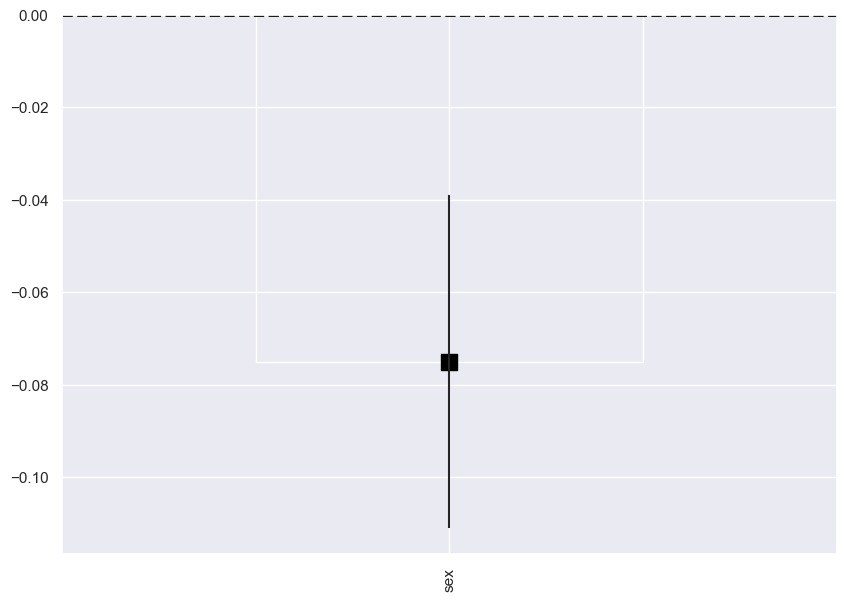

In [29]:

fig, ax = plt.subplots(figsize=(10, 7))

nocoef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=np.arange(nocoef_df.shape[0]), 
           marker='s', s=120, 
           y=nocoef_df['coef'], color='black')

ax.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.show()

In [30]:
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

control_model = smf.ols( formula = flex, data = Submuestra_sup )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']

print(control_model.fit().summary2().tables[1])

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[42]  # error standard for sex's coefficients 

control_se

print( f"Coefficient for OLS with controls {control_est} and the corresponding robust standard error is {control_se}" )

control_model.fit().conf_int( alpha=0.05 ).loc[['sex']]

               Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
Intercept   3.350844  0.319263  10.495548  2.129350e-25  2.724885  3.976803
occ2[T.10]  0.009382  0.166232   0.056436  9.549973e-01 -0.316539  0.335302
occ2[T.11] -0.574719  0.340497  -1.687883  9.152172e-02 -1.242308  0.092871
occ2[T.12] -0.132992  0.265391  -0.501117  6.163196e-01 -0.653326  0.387342
occ2[T.13] -0.267986  0.251119  -1.067169  2.859685e-01 -0.760338  0.224366
...              ...       ...        ...           ...       ...       ...
exp4:scl    0.024112  0.025867   0.932148  3.513237e-01 -0.026604  0.074829
exp4:clg    0.008900  0.023652   0.376285  7.067278e-01 -0.037473  0.055273
exp4:mw     0.012197  0.022784   0.535335  5.924519e-01 -0.032474  0.056868
exp4:so     0.006360  0.019596   0.324536  7.455511e-01 -0.032061  0.044780
exp4:we     0.033250  0.020541   1.618716  1.055976e-01 -0.007023  0.073524

[246 rows x 6 columns]
Coefficient for OLS with controls -0.06763389814419099 and the c

,0,1
sex,-0.101899,-0.033369


In [31]:
control_model_fit = control_model.fit()
coefficients = control_model_fit.params 
std_errors = control_model_fit.bse
coefficients

Intercept     3.350844
occ2[T.10]    0.009382
occ2[T.11]   -0.574719
occ2[T.12]   -0.132992
occ2[T.13]   -0.267986
                ...   
exp4:scl      0.024112
exp4:clg      0.008900
exp4:mw       0.012197
exp4:so       0.006360
exp4:we       0.033250
Length: 246, dtype: float64

In [32]:
err_series= coefficients-control_model.fit().conf_int()[0]

In [33]:
coef_df = pd.DataFrame({
    'coef': coefficients[1:],  # Excluir el intercepto
    'err': err_series.values[1:],     # Excluir el error estándar del intercepto
    'varname':  err_series.index.values[1:]  # Los nombres de las variables, excluyendo el intercepto
})
coef_df

,coef,err,varname
occ2[T.10],0.009382,0.325920,occ2[T.10]
occ2[T.11],-0.574719,0.667589,occ2[T.11]
occ2[T.12],-0.132992,0.520334,occ2[T.12]
occ2[T.13],-0.267986,0.492352,occ2[T.13]
occ2[T.14],0.230008,0.732527,occ2[T.14]
...,...,...,...
exp4:scl,0.024112,0.050716,exp4:scl
exp4:clg,0.008900,0.046373,exp4:clg
exp4:mw,0.012197,0.044671,exp4:mw
exp4:so,0.006360,0.038420,exp4:so


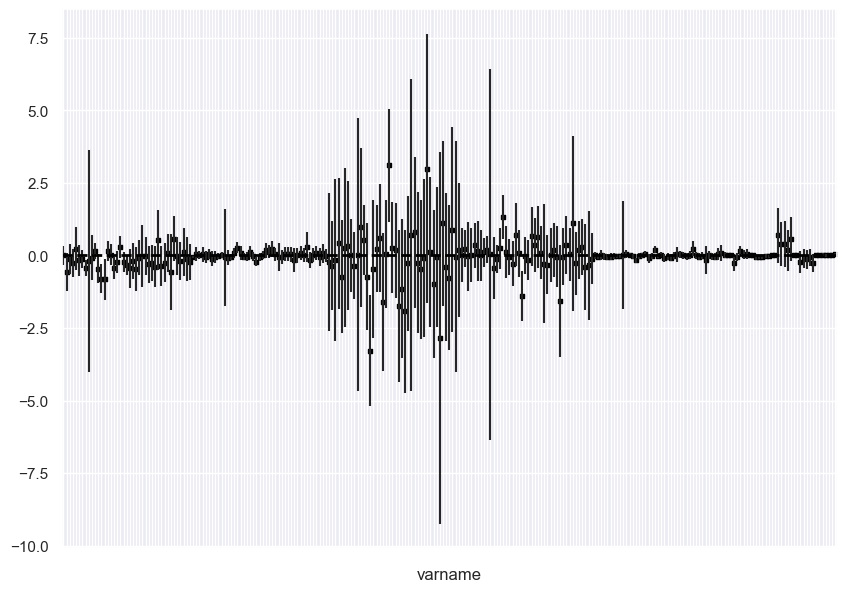

In [34]:

fig, ax = plt.subplots(figsize=(10, 7))

coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)

ax.scatter(x=np.arange(coef_df.shape[0]), 
           marker='s', s=10, 
           y=coef_df['coef'], color='black')

ax.axhline(y=0, linestyle='--', color='black', linewidth=2)
ax.set_xticklabels([])
plt.show()


## Partialling-Out using ols

In [35]:
# models
# model for Y
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
# model for D
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = Submuestra_sup ).fit().resid

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = Submuestra_sup ).fit().resid


data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )


# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']


# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

print( f"Coefficient for D via partialling-out {partial_est} and the corresponding robust standard error is {partial_se}" )

# confidence interval
partial_fit.conf_int( alpha=0.05 ).loc[['t_D']]

Coefficient for D via partialling-out -0.0676338981441927 and the corresponding robust standard error is 0.016765360629537058


,0,1
t_D,-0.100823,-0.034445


In [36]:
#np.vstack(( t_Y.values , t_D.values )).T
data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )
data_res

,t_Y,t_D
0,-0.509678,0.083315
1,0.362579,-0.647915
2,-1.051747,0.400809
3,0.212027,0.316279
4,-0.430030,0.430993
...,...,...
3769,-0.526953,-0.444549
3770,-0.191339,-0.411842
3771,0.628487,0.518624
3772,-0.058179,0.048409


In [37]:
coef = {
    'coef': [nocontrol_est, control_est, partial_est],
    'err': [nocontrol_se2, control_se, partial_se],
    'varname': ['nocontrol', 'control', 'partial']
}

# Crear el DataFrame
coef_df = pd.DataFrame(coef)

# Mostrar el DataFrame
print(df)

NameError: name 'df' is not defined

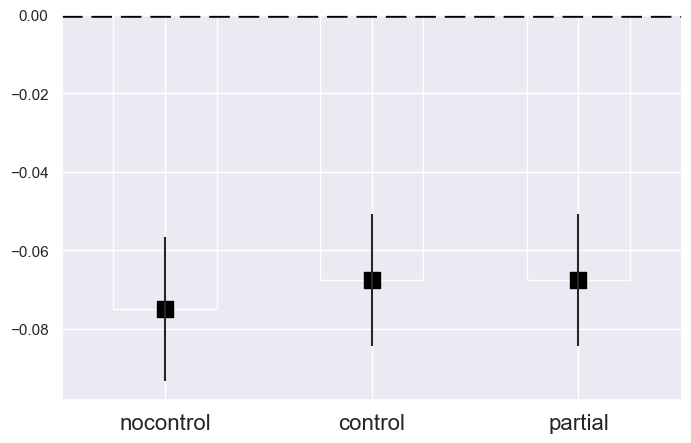

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['nocontrol', 'control', 'partial'], 
                       rotation=0, fontsize=16)

Cross validation

Number of observation: 5150 

Number of raw regressors: 18


/var/folders/wj/10d1xq4s5zjg2x3ww93bw6t40000gn/T/ipykernel_56257/3281157588.py:95: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'Alpha': [alpha], 'MSE_Lasso': [MSE_lasso]})], ignore_index=True)


    MSE_Lasso  Alpha
0    0.251018   0.15
1    0.298656   0.15
2    0.279841   0.15
3    0.271916   0.15
4    0.271341   0.15
..        ...    ...
95   0.351903   0.16
96   0.262643   0.16
97   0.306209   0.16
98   0.296443   0.16
99   0.320686   0.16

[100 rows x 2 columns]


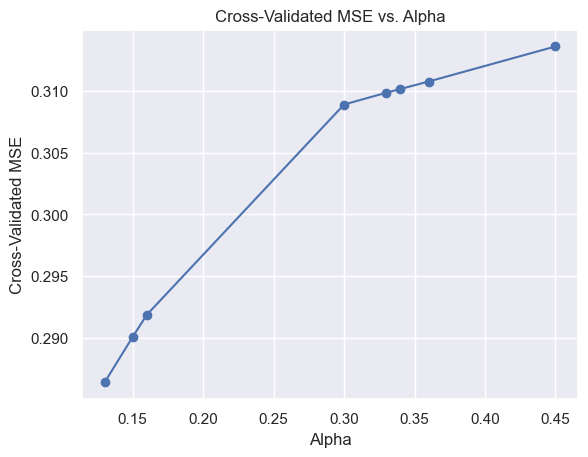

The optimal alpha is:  0.13
The MSE of the test set with the optimal alpha is:  0.25739222393725386


In [39]:
import pandas as pd
import numpy as np
import pyreadr as rr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 
import random as rndm
import math
import matplotlib.pyplot as plt

######### 1. Data preparation
rdata_read = rr.read_r("/Users/frank/Downloads/basem.Rdata")

# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]

data['occ']=pd.Categorical(data.occ)
data['occ2']=pd.Categorical(data.occ2)
data['ind']=pd.Categorical(data.ind)
data['ind2']=pd.Categorical(data.ind2)

Y = np.log2(data['wage']) 
n = len(Y)
z = data.loc[:, ~data.columns.isin(['wage', 'lwage','Unnamed: 0'])]
p = z.shape[1]

print("Number of observation:", n, '\n')
print( "Number of raw regressors:", p)

#########  2 Alfas
alfas = [round(rndm.uniform(0.1, 0.5), 2) for z in range(10)]

######### 3 Particion
# Randomizacion

np.random.seed(69)
random = np.random.randint(0,n, size=math.floor(n))
data["random"] = random
data_2 = data.sort_values(by=['random'])

#Divisiones o folds
k = 10

# Calcula el tamaño de cada subset
subset_size = len(data) // k

# Crea una lista para almacenar los subsets
subsets = []

# Divide el DataFrame en 10 subsets
for i in range(k):
    start_index = i * subset_size
    end_index = start_index + subset_size
    
    # El último subset podría tener un tamaño ligeramente diferente
    if i == 9:
        subset = data.iloc[start_index:]
    else:
        subset = data.iloc[start_index:end_index]
    
    subsets.append(subset)

######### 4&5 Lasso - Cross Validation

# Creación del DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['MSE_Lasso'])

for alpha in alfas:
    for j in range(k):
        test  = subsets[j]
        validation_sets = subsets[:j] + subsets[j+1:]  # Todos los subsets menos el j-ésimo
        train = pd.concat(validation_sets)
        flex = 'lwage ~ sex + shs+hsg+scl+clg+occ2+ind2+mw+so+we + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

        flex_results = smf.ols(flex , data=train).fit()

        # Datos de entrenamiento
        flex_results_0 = smf.ols(flex , data=train)
        X_train = flex_results_0.exog
        lwage_train = train["lwage"]
        # Datos de prueba
        flex_results_1 = smf.ols(flex , data=test)
        X_test = flex_results_1.exog
        lwage_test = test["lwage"]

        reg = linear_model.Lasso(alpha=alpha)
        lwage_lasso_fitted = reg.fit(X_train, lwage_train).predict(X_test)

        MSE_lasso = np.sum((lwage_test - lwage_lasso_fitted) ** 2) / len(lwage_test)

        # Agregar los resultados al DataFrame
        results_df = pd.concat([results_df, pd.DataFrame({'Alpha': [alpha], 'MSE_Lasso': [MSE_lasso]})], ignore_index=True)

print(results_df)
    
average_results_df = results_df.groupby('Alpha').mean().reset_index()
    
######### 6 Best Alfa


minmce = average_results_df['MSE_Lasso'].idxmin()
# Obtener el valor de alpha correspondiente al mínimo valor de MSE_Lasso
mejoralfa = average_results_df.loc[minmce, 'Alpha']
######### 7 Evaluation

j = rndm.randint(0,9)

test  = subsets[j]
validation_sets = subsets[:j] + subsets[j+1:]  # Todos los subsets menos el j-ésimo
train = pd.concat(validation_sets)
flex = 'lwage ~ sex + shs+hsg+scl+clg+occ2+ind2+mw+so+we + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

flex_results = smf.ols(flex , data=train).fit()

# Datos de entrenamiento
flex_results_0 = smf.ols(flex , data=train)
X_train = flex_results_0.exog
lwage_train = train["lwage"]
# Datos de prueba
flex_results_1 = smf.ols(flex , data=test)
X_test = flex_results_1.exog
lwage_test = test["lwage"]

reg = linear_model.Lasso(alpha=mejoralfa)
lwage_lasso_fitted = reg.fit(X_train, lwage_train).predict(X_test)

MSE_lasso = np.sum((lwage_test - lwage_lasso_fitted) ** 2) / len(lwage_test)


######### 8 Evaluation

# Graficar MSE cruzado promedio vs. alfa
plt.plot(average_results_df['Alpha'], average_results_df['MSE_Lasso'], marker='o')
plt.title('Cross-Validated MSE vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated MSE')
plt.grid(True)
plt.show()

print("The optimal alpha is: ", mejoralfa)
print("The MSE of the test set with the optimal alpha is: ", MSE_lasso)
